In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

Calculation started (calculation_id=56ca38d9-8852-e0f5-e30e-5b7adda2a0e2) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


In [2]:
sql_df = spark.sql('SELECT * from `fiap-etl-tech-challenge`.tb_b3_refined')

Calculation started (calculation_id=7cca38d9-9516-230c-e9a7-99dcb25f0604) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


In [3]:
sql_df.show()

Calculation started (calculation_id=82ca38d9-9e58-4489-3a41-b0cf03e9adc4) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+--------------------------------+------------------------------------+------+----+-----+-------------+
|avg_monthly_theoretical_quantity|avg_monthly_participation_percentage|  code|year|month|week_of_month|
+--------------------------------+------------------------------------+------+----+-----+-------------+
|                   1.929556616E9|                              1.0675| ENEV3|2025|    1|            3|
|                    3.14150156E8|                                0.33| MULT3|2025|    1|            3|
|                    1.94261422E8|                               0.176| SLCE3|2024|   12|            5|
|                   1.287247964E9|                              1.8335|BPAC11|2024|   12|            4|
|                     3.5658673E8|                               0.437|SANB11|2025|    1|            1|
|                    9.91920937E8|                               0.522| CCRO3|2024|   12|            5|
|                    3.53448195E8|       

In [4]:
pandas_df = sql_df.toPandas()

Calculation started (calculation_id=56ca38d9-b395-7859-a7ad-d5b437987da7) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


Calculation started (calculation_id=98ca38d9-c8b9-8362-8b14-3c0578a03d6d) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


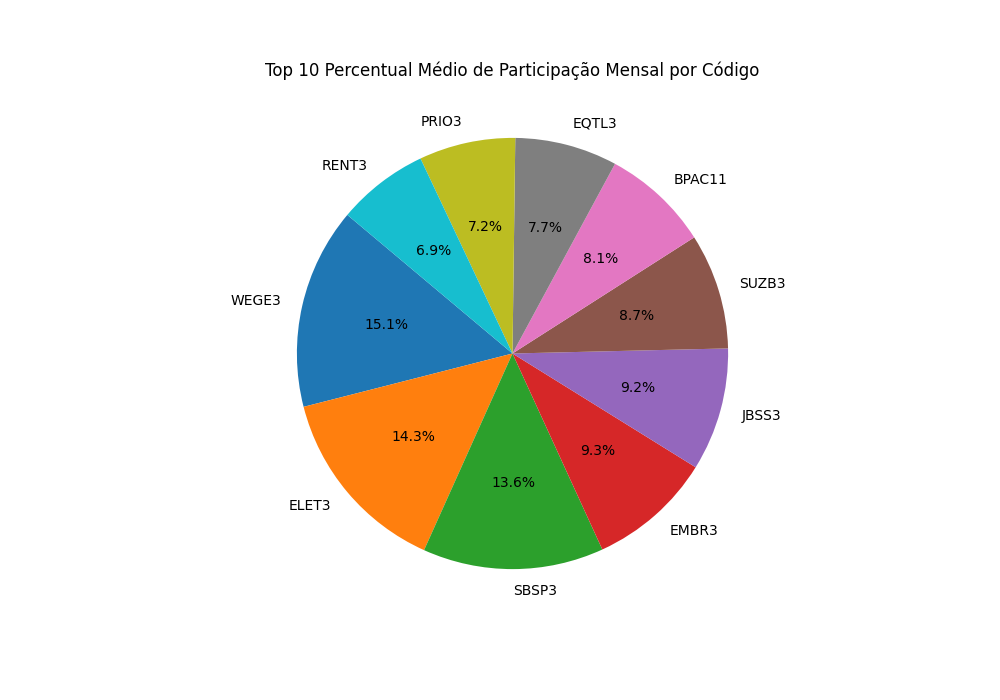

In [5]:
agg_data = pandas_df.groupby('code')['avg_monthly_participation_percentage'].mean()
top_10 = agg_data.nlargest(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Percentual M�dio de Participa��o Mensal por C�digo')
plt.show()
%matplot plt

Calculation started (calculation_id=daca38d9-ce1c-444b-024d-3f16ab6509f4) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


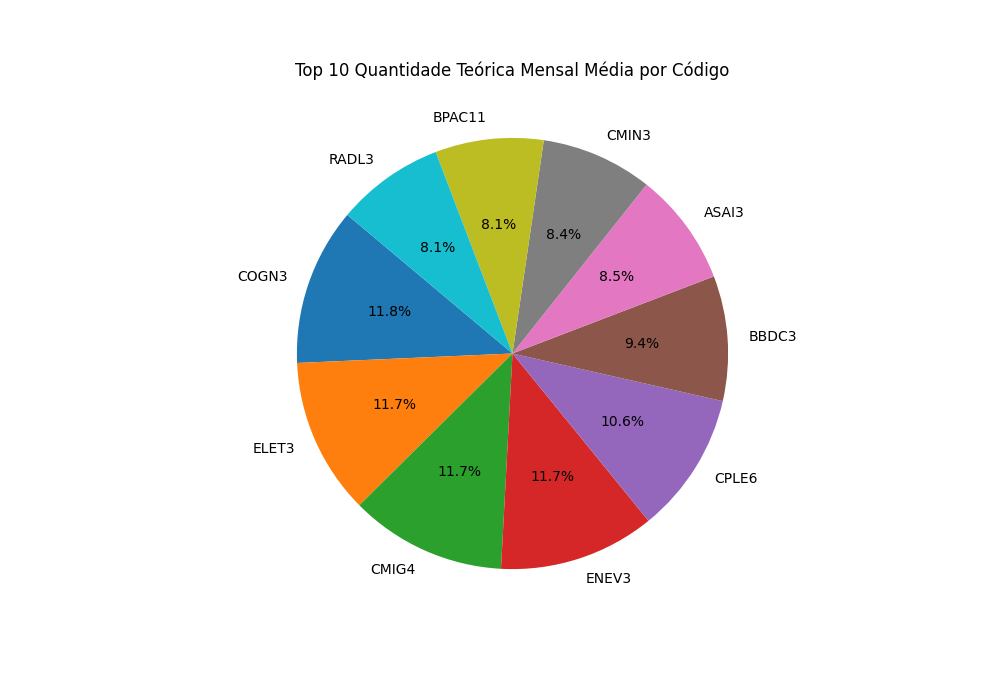

In [6]:
agg_data = pandas_df.groupby('code')['avg_monthly_theoretical_quantity'].mean()
top_10 = agg_data.nlargest(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Quantidade Te�rica Mensal M�dia por C�digo')
plt.show()
%matplot plt

Calculation started (calculation_id=5aca38d9-d346-e50c-294b-d5377803d21b) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


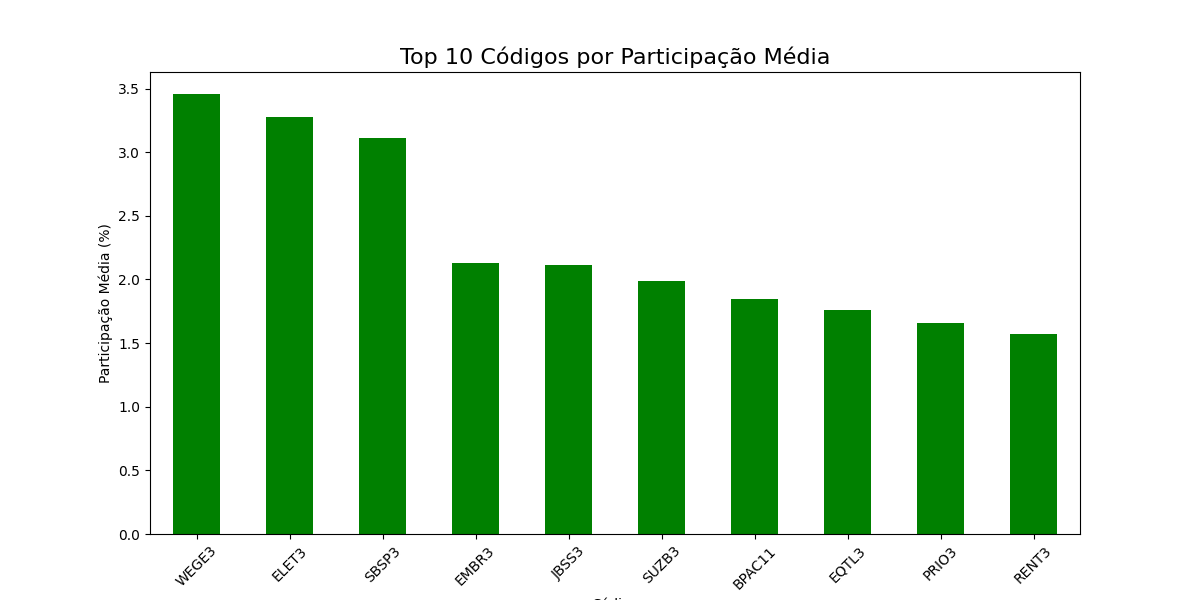

In [7]:
top_codes = pandas_df.groupby('code')['avg_monthly_participation_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_codes.plot(kind='bar', color='green')
plt.title('Top 10 C�digos por Participa��o M�dia', fontsize=16)
plt.ylabel('Participa��o M�dia (%)')
plt.xlabel('C�digo')
plt.xticks(rotation=45)
plt.show()
%matplot plt

Calculation started (calculation_id=02ca38d9-d901-f2eb-cccb-cc5f33942cbc) in (session=84ca38d9-7087-ab93-b780-75c0a0faa3d1). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


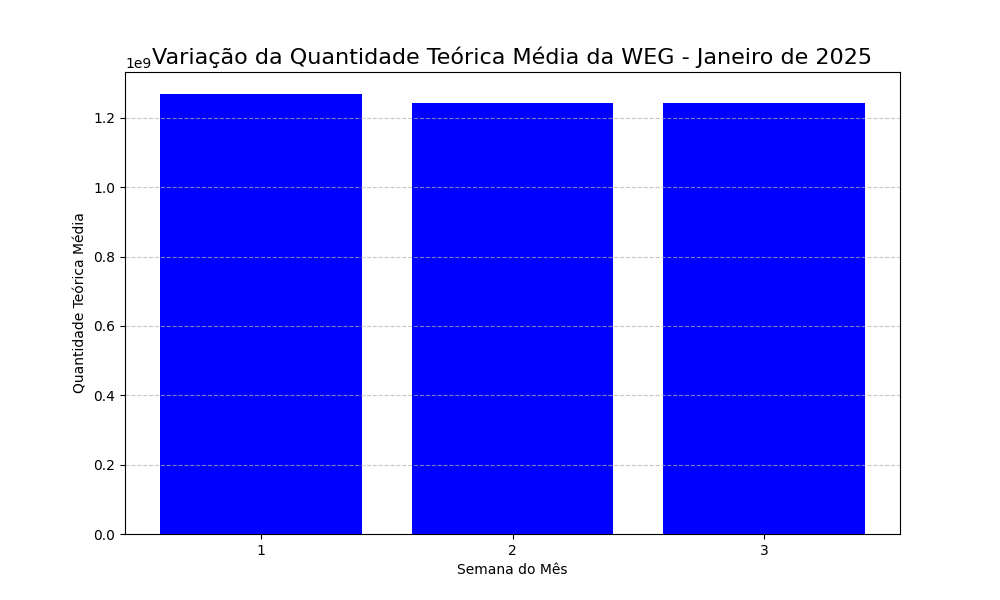

In [8]:
# Filtrando os dados para janeiro de 2025 e para a WEG
weg_january_2025 = pandas_df[(pandas_df['year'] == 2025) & 
                              (pandas_df['month'] == 1) & 
                              (pandas_df['code'] == 'WEGE3')]


plt.figure(figsize=(10, 6))
plt.bar(weg_january_2025['week_of_month'], weg_january_2025['avg_monthly_theoretical_quantity'], color='blue')
plt.title('Varia��o da Quantidade Te�rica M�dia da WEG - Janeiro de 2025', fontsize=16)
plt.xlabel('Semana do M�s')
plt.ylabel('Quantidade Te�rica M�dia')
plt.xticks(weg_january_2025['week_of_month'], labels=weg_january_2025['week_of_month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
%matplot plt